In [ ]:
#note that do not apply SMOTE on the test or validate set. Balancing is only for training data to prevent data leakage.
!pip install imbalanced-learn

In [1]:
# Import different packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import pickle

In [2]:
# Load the processed data

file_path = '../data/processed/data.csv'
data = pd.read_csv(file_path)

data.shape

(6819, 79)

In [4]:
# Define target and features
X = data.drop(columns=['Bankrupt?'])  # Drop the target column
y = data['Bankrupt?']  # Target column

# Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
# Preprocessing the features

num_cols = X.select_dtypes(include=[float]).columns.to_list()

pipe_num = Pipeline([
    ('standardizer', StandardScaler())
])

prepoc = ColumnTransformer([
    ('num_transforms', pipe_num, num_cols)
], remainder='passthrough')
prepoc

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_transforms',
                                 Pipeline(steps=[('standardizer',
                                                  StandardScaler())]),
                                 ['ROA(C) before interest and depreciation '
                                  'before interest',
                                  'ROA(A) before interest and % after tax',
                                  'ROA(B) before interest and depreciation '
                                  'after tax',
                                  'Realized Sales Gross Margin',
                                  'Pre-tax net Interest Rate',
                                  'After-tax net Interest Rate',
                                  'Non-in...
                                  'Cash Flow Per Share',
                                  'Revenue Per Share (Yuan ¥)',
                                  'Operating Profit Per Share (Yuan ¥)',
                                  'Per Share Net profit before tax (Yuan ¥)',
                                  'Operating Profit Growth Rate',
                                  'After-tax Net Profit Growth Rate',
                                  'Regular Net Profit Growth Rate',
                                  'Continuous Net Profit Growth Rate',
                                  'Total Asset Growth Rate',
                                  'Net Value Growth Rate',
                                  'Total Asset Return Growth Rate Ratio',
                                  'Cash Reinvestment %', 'Quick Ratio', ...])])

In [6]:
# Logistic regression classifier pipeline

pipe1 = Pipeline([
    ('preprocessing', prepoc),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression())
])

pipe1

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', LogisticRegression())])

In [7]:
# Support vector machine classifier pipeline

pipe2 = Pipeline([
    ('preprocessing', prepoc),
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC())
])

pipe2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   '(Yuan ¥)',
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('smote', SMOTE(random_state=42)), ('classifier', SVC())])

In [8]:
# Decision tree classifier pipeline

pipe3 = Pipeline([
    ('preprocessing', prepoc),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier())
])

pipe3

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', DecisionTreeClassifier())])

In [9]:
# Random forrest classifier pipeline

pipe4 = Pipeline([
    ('preprocessing', prepoc),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier())
])

pipe4

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier())])

In [10]:
# K nearest neighbors classifier pipeline

pipe5 = Pipeline([
    ('preprocessing', prepoc),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

pipe5

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', KNeighborsClassifier())])

In [11]:
# Multi-layer perceptron classifier pipeline

pipe6 = Pipeline([
    ('preprocessing', prepoc),
    ('smote', SMOTE(random_state=42)),
    ('classifier', MLPClassifier())
])

pipe6

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('standardizer',
                                                                   StandardScaler())]),
                                                  ['ROA(C) before interest and '
                                                   'depreciation before '
                                                   'interest',
                                                   'ROA(A) before interest and '
                                                   '% after tax',
                                                   'ROA(B) before interest and '
                                                   'depreciation after tax',
                                                   'Realized Sales Gross '
                                                   'Margin',
                                                   'Pre-tax net Interest R...
                                                   'Per Share Net profit '
                                                   'before tax (Yuan ¥)',
                                                   'Operating Profit Growth '
                                                   'Rate',
                                                   'After-tax Net Profit '
                                                   'Growth Rate',
                                                   'Regular Net Profit Growth '
                                                   'Rate',
                                                   'Continuous Net Profit '
                                                   'Growth Rate',
                                                   'Total Asset Growth Rate',
                                                   'Net Value Growth Rate',
                                                   'Total Asset Return Growth '
                                                   'Rate Ratio',
                                                   'Cash Reinvestment %',
                                                   'Quick Ratio', ...])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', MLPClassifier())])

In [49]:
# Scoring metrics with probability
scoring_prob = ['neg_log_loss', 'roc_auc', 'accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall']

# Scoring metrics without probability
scoring = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall']

# Logistic regression classifier pipelines
log_param = {
    'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'classifier__class_weight': ['balanced', None],
    'classifier__max_iter': [100, 150],
    'classifier__random_state': [42]
    }

# Support vector machine classifier pipelines
svc_param = {
    'classifier__class_weight': ['balanced', None],
    'classifier__max_iter': [100, 150],
    'classifier__random_state': [42]
    }

# Decision Tree classifier parameters
tree_param = {
    'classifier__criterion': ['gini'],
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__class_weight': ['balanced', None],
    'classifier__random_state': [42]
    }

# Random forrest classifier parameters
forrest_param = {
    'classifier__n_estimators': [100, 150],
    'classifier__criterion': ['gini'],
    'classifier__max_depth': [3, 5, 7],
    'classifier__class_weight': ['balanced', None],
    'classifier__random_state': [42]
    }

# K nearest neighbors classifier parameters
knn_param = {
    'classifier__n_neighbors': [5, 10, 15, 20],
    'classifier__weights': ['uniform', 'distance', None]
    }

# Multi-layer perceptron classifier parameters
mlp_param = {
    'classifier__hidden_layer_sizes': [(32,), (64,), (128,)],
    'classifier__alpha': [0.0001, 1, 100, 1000],
    'classifier__max_iter': [20, 50], # Numver of epoches
    'classifier__random_state': [42]
    }

best_test_scores = []

In [13]:
grid_cv1 = GridSearchCV(
    estimator=pipe1, 
    param_grid=log_param, 
    scoring = scoring_prob,
    cv = 5,
    refit = 'balanced_accuracy')

grid_cv1.fit(X_train, y_train)

res = grid_cv1.cv_results_
res = pd.DataFrame(res)
res[['mean_fit_time', 'params', 'mean_test_accuracy', 'rank_test_accuracy',
        'mean_test_balanced_accuracy', 'rank_test_balanced_accuracy', 'mean_test_recall', 'rank_test_recall',
        'mean_test_f1', 'rank_test_f1', 'mean_test_precision', 'rank_test_precision',
        'mean_test_neg_log_loss', 'rank_test_neg_log_loss',
        'mean_test_roc_auc', 'rank_test_roc_auc']].sort_values('rank_test_balanced_accuracy')

c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

,mean_fit_time,params,mean_test_accuracy,rank_test_accuracy,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_recall,rank_test_recall,mean_test_f1,rank_test_f1,mean_test_precision,rank_test_precision,mean_test_neg_log_loss,rank_test_neg_log_loss,mean_test_roc_auc,rank_test_roc_auc
17,0.416819,"{'classifier__class_weight': None, 'classifier...",0.867461,23,0.832630,1,0.795397,1,0.278735,23,0.169210,23,-0.338634,7,0.911949,1
5,0.408789,"{'classifier__class_weight': 'balanced', 'clas...",0.867461,23,0.832630,1,0.795397,1,0.278735,23,0.169210,23,-0.338634,7,0.911949,1
11,0.616145,"{'classifier__class_weight': 'balanced', 'clas...",0.871311,21,0.831936,3,0.789841,3,0.283160,7,0.172685,19,-0.335092,3,0.908166,3
23,0.610925,"{'classifier__class_weight': None, 'classifier...",0.871311,21,0.831936,3,0.789841,3,0.283160,7,0.172685,19,-0.335092,3,0.908166,3
4,0.366319,"{'classifier__class_weight': 'balanced', 'clas...",0.872594,19,0.827074,5,0.778413,5,0.282189,11,0.172512,21,-0.334471,1,0.906903,5
16,0.366308,"{'classifier__class_weight': None, 'classifier...",0.872594,19,0.827074,5,0.778413,5,0.282189,11,0.172512,21,-0.334471,1,0.906903,5
22,0.553201,"{'classifier__class_weight': None, 'classifier...",0.874610,17,0.825353,7,0.772698,7,0.284144,1,0.174270,15,-0.335807,5,0.905173,7
10,0.544618,"{'classifier__class_weight': 'balanced', 'clas...",0.874610,17,0.825353,7,0.772698,7,0.284144,1,0.174270,15,-0.335807,5,0.905173,7
19,0.225012,"{'classifier__class_weight': None, 'classifier...",0.879560,11,0.811574,9,0.738889,9,0.283570,3,0.175602,1,-0.356716,17,0.891087,11
1,0.206451,"{'classifier__class_weight': 'balanced', 'clas...",0.879560,11,0.811574,9,0.738889,9,0.283570,3,0.175602,1,-0.356716,17,0.891087,11


In [14]:
grid_cv1.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__max_iter': 100,
 'classifier__random_state': 42,
 'classifier__solver': 'saga'}

In [56]:
model1 = grid_cv1.best_estimator_

y_pred_test = model1.predict(X_test)
y_proba_test = model1.predict_proba(X_test)

best_test_scores.append(['Logistic Regression', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), log_loss(y_test, y_proba_test),
                         roc_auc_score(y_test, y_proba_test[:,1])])

performance_metrics = {
    'accuracy_score_test': accuracy_score(y_test, y_pred_test),
    'balanced_accuracy_score_test': balanced_accuracy_score(y_test, y_pred_test),
    'recall_score_test': recall_score(y_test, y_pred_test),
    'f1_score_test': f1_score(y_test, y_pred_test),
    'precision_score_test': precision_score(y_test, y_pred_test),
    'log_loss_test': log_loss(y_test, y_proba_test),
    'roc_auc_score_test': roc_auc_score(y_test, y_proba_test[:,1])
}
performance_metrics

{'accuracy_score_test': 0.8717008797653959,
 'balanced_accuracy_score_test': 0.8458333333333334,
 'recall_score_test': 0.8181818181818182,
 'f1_score_test': 0.291497975708502,
 'precision_score_test': 0.17733990147783252,
 'log_loss_test': 0.3176744217178027,
 'roc_auc_score_test': 0.9345213498622591}

In [16]:
grid_cv2 = GridSearchCV(
    estimator=pipe2, 
    param_grid=svc_param, 
    scoring = scoring,
    cv = 5,
    refit = 'balanced_accuracy')

grid_cv2.fit(X_train, y_train)

res = grid_cv2.cv_results_
res = pd.DataFrame(res)
res[['mean_fit_time', 'params', 'mean_test_accuracy', 'rank_test_accuracy',
        'mean_test_balanced_accuracy', 'rank_test_balanced_accuracy', 'mean_test_recall', 'rank_test_recall',
        'mean_test_f1', 'rank_test_f1', 'mean_test_precision', 'rank_test_precision']].sort_values('rank_test_balanced_accuracy')

c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\erfan\anaconda3\envs\dsi_participan

,mean_fit_time,params,mean_test_accuracy,rank_test_accuracy,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_recall,rank_test_recall,mean_test_f1,rank_test_f1,mean_test_precision,rank_test_precision
0,0.069831,"{'classifier__class_weight': 'balanced', 'clas...",0.207516,1,0.464028,1,0.738254,3,0.056860,1,0.029571,1
2,0.070041,"{'classifier__class_weight': None, 'classifier...",0.207516,1,0.464028,1,0.738254,3,0.056860,1,0.029571,1
1,0.095433,"{'classifier__class_weight': 'balanced', 'clas...",0.195234,3,0.460447,3,0.743968,1,0.056368,3,0.029294,3
3,0.095770,"{'classifier__class_weight': None, 'classifier...",0.195234,3,0.460447,3,0.743968,1,0.056368,3,0.029294,3


In [17]:
grid_cv2.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__max_iter': 100,
 'classifier__random_state': 42}

In [57]:
model2 = grid_cv2.best_estimator_

y_pred_test = model2.predict(X_test)

best_test_scores.append(['SVC', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), 'NA', 'NA'])

performance_metrics = {
    'accuracy_score_test': accuracy_score(y_test, y_pred_test),
    'balanced_accuracy_score_test': balanced_accuracy_score(y_test, y_pred_test),
    'recall_score_test': recall_score(y_test, y_pred_test),
    'f1_score_test': f1_score(y_test, y_pred_test),
    'precision_score_test': precision_score(y_test, y_pred_test),
}
performance_metrics

{'accuracy_score_test': 0.1598240469208211,
 'balanced_accuracy_score_test': 0.4340909090909091,
 'recall_score_test': 0.7272727272727273,
 'f1_score_test': 0.05289256198347107,
 'precision_score_test': 0.0274442538593482}

In [19]:
grid_cv3 = GridSearchCV(
    estimator=pipe3, 
    param_grid=tree_param, 
    scoring = scoring_prob,
    cv = 5,
    refit = 'balanced_accuracy')

grid_cv3.fit(X_train, y_train)

res = grid_cv3.cv_results_
res = pd.DataFrame(res)
res[['mean_fit_time', 'params', 'mean_test_accuracy', 'rank_test_accuracy',
        'mean_test_balanced_accuracy', 'rank_test_balanced_accuracy', 'mean_test_recall', 'rank_test_recall',
        'mean_test_f1', 'rank_test_f1', 'mean_test_precision', 'rank_test_precision',
        'mean_test_neg_log_loss', 'rank_test_neg_log_loss',
        'mean_test_roc_auc', 'rank_test_roc_auc']].sort_values('rank_test_balanced_accuracy')

,mean_fit_time,params,mean_test_accuracy,rank_test_accuracy,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_recall,rank_test_recall,mean_test_f1,rank_test_f1,mean_test_precision,rank_test_precision,mean_test_neg_log_loss,rank_test_neg_log_loss,mean_test_roc_auc,rank_test_roc_auc
0,0.171622,"{'classifier__class_weight': 'balanced', 'clas...",0.838863,7,0.814852,1,0.789206,1,0.239315,7,0.141241,7,-0.362551,1,0.869498,1
4,0.161688,"{'classifier__class_weight': None, 'classifier...",0.838863,7,0.814852,1,0.789206,1,0.239315,7,0.141241,7,-0.362551,1,0.869498,1
1,0.265431,"{'classifier__class_weight': 'balanced', 'clas...",0.881760,5,0.774117,3,0.659048,3,0.267108,3,0.168224,5,-0.423557,3,0.836377,3
5,0.251031,"{'classifier__class_weight': None, 'classifier...",0.881760,5,0.774117,3,0.659048,3,0.267108,3,0.168224,5,-0.423557,3,0.836377,3
2,0.447929,"{'classifier__class_weight': 'balanced', 'clas...",0.913474,3,0.730204,5,0.534286,5,0.287271,1,0.197837,3,-1.353025,5,0.717518,5
6,0.408946,"{'classifier__class_weight': None, 'classifier...",0.913474,3,0.730204,5,0.534286,5,0.287271,1,0.197837,3,-1.353025,5,0.717518,5
3,0.861322,"{'classifier__class_weight': 'balanced', 'clas...",0.931072,1,0.665268,7,0.381111,7,0.259249,5,0.198233,1,-2.484402,7,0.665268,7
7,0.779827,"{'classifier__class_weight': None, 'classifier...",0.931072,1,0.665268,7,0.381111,7,0.259249,5,0.198233,1,-2.484402,7,0.665268,7


In [20]:
grid_cv3.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__criterion': 'gini',
 'classifier__max_depth': 3,
 'classifier__random_state': 42}

In [58]:
model3 = grid_cv3.best_estimator_

y_pred_test = model3.predict(X_test)
y_proba_test = model3.predict_proba(X_test)

best_test_scores.append(['Decision Tree', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), log_loss(y_test, y_proba_test),
                         roc_auc_score(y_test, y_proba_test[:,1])])

performance_metrics = {
    'accuracy_score_test': accuracy_score(y_test, y_pred_test),
    'balanced_accuracy_score_test': balanced_accuracy_score(y_test, y_pred_test),
    'recall_score_test': recall_score(y_test, y_pred_test),
    'f1_score_test': f1_score(y_test, y_pred_test),
    'precision_score_test': precision_score(y_test, y_pred_test),
    'log_loss_test': log_loss(y_test, y_proba_test),
    'roc_auc_score_test': roc_auc_score(y_test, y_proba_test[:,1])
}
performance_metrics

{'accuracy_score_test': 0.8108504398826979,
 'balanced_accuracy_score_test': 0.8253787878787879,
 'recall_score_test': 0.8409090909090909,
 'f1_score_test': 0.22289156626506024,
 'precision_score_test': 0.1284722222222222,
 'log_loss_test': 0.31092465110930056,
 'roc_auc_score_test': 0.8869232093663911}

In [22]:
grid_cv4 = GridSearchCV(
    estimator=pipe4, 
    param_grid= forrest_param, 
    scoring = scoring_prob,
    cv = 5,
    refit = 'balanced_accuracy')

grid_cv4.fit(X_train, y_train)

res = grid_cv4.cv_results_
res = pd.DataFrame(res)
res[['mean_fit_time', 'params', 'mean_test_accuracy', 'rank_test_accuracy',
        'mean_test_balanced_accuracy', 'rank_test_balanced_accuracy', 'mean_test_recall', 'rank_test_recall',
        'mean_test_f1', 'rank_test_f1', 'mean_test_precision', 'rank_test_precision',
        'mean_test_neg_log_loss', 'rank_test_neg_log_loss',
        'mean_test_roc_auc', 'rank_test_roc_auc']].sort_values('rank_test_balanced_accuracy')

,mean_fit_time,params,mean_test_accuracy,rank_test_accuracy,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_recall,rank_test_recall,mean_test_f1,rank_test_f1,mean_test_precision,rank_test_precision,mean_test_neg_log_loss,rank_test_neg_log_loss,mean_test_roc_auc,rank_test_roc_auc
2,1.770671,"{'classifier__class_weight': 'balanced', 'clas...",0.894409,5,0.849315,1,0.801111,5,0.327212,5,0.206005,5,-0.240751,5,0.929895,3
8,1.768618,"{'classifier__class_weight': None, 'classifier...",0.894409,5,0.849315,1,0.801111,5,0.327212,5,0.206005,5,-0.240751,5,0.929895,3
1,1.736209,"{'classifier__class_weight': 'balanced', 'clas...",0.865628,11,0.848098,3,0.829365,1,0.283874,9,0.171410,9,-0.307595,11,0.927256,11
7,1.698206,"{'classifier__class_weight': None, 'classifier...",0.865628,11,0.848098,3,0.829365,1,0.283874,9,0.171410,9,-0.307595,11,0.927256,11
3,2.637505,"{'classifier__class_weight': 'balanced', 'clas...",0.893859,7,0.846189,5,0.795238,7,0.324644,7,0.204368,7,-0.240897,7,0.929986,1
9,2.557769,"{'classifier__class_weight': None, 'classifier...",0.893859,7,0.846189,5,0.795238,7,0.324644,7,0.204368,7,-0.240897,7,0.929986,1
0,1.135208,"{'classifier__class_weight': 'balanced', 'clas...",0.867278,9,0.840662,7,0.812222,3,0.282037,11,0.170938,11,-0.306581,9,0.927777,9
6,1.101354,"{'classifier__class_weight': None, 'classifier...",0.867278,9,0.840662,7,0.812222,3,0.282037,11,0.170938,11,-0.306581,9,0.927777,9
5,3.301911,"{'classifier__class_weight': 'balanced', 'clas...",0.919707,1,0.826713,9,0.727302,9,0.367743,1,0.246840,1,-0.191975,1,0.929850,5
11,3.283312,"{'classifier__class_weight': None, 'classifier...",0.919707,1,0.826713,9,0.727302,9,0.367743,1,0.246840,1,-0.191975,1,0.929850,5


In [23]:
grid_cv4.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__criterion': 'gini',
 'classifier__max_depth': 5,
 'classifier__n_estimators': 100,
 'classifier__random_state': 42}

In [59]:
model4 = grid_cv4.best_estimator_

y_pred_test = model4.predict(X_test)
y_proba_test = model4.predict_proba(X_test)

best_test_scores.append(['Random Forrest', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), log_loss(y_test, y_proba_test),
                         roc_auc_score(y_test, y_proba_test[:,1])])

performance_metrics = {
    'accuracy_score_test': accuracy_score(y_test, y_pred_test),
    'balanced_accuracy_score_test': balanced_accuracy_score(y_test, y_pred_test),
    'recall_score_test': recall_score(y_test, y_pred_test),
    'f1_score_test': f1_score(y_test, y_pred_test),
    'precision_score_test': precision_score(y_test, y_pred_test),
    'log_loss_test': log_loss(y_test, y_proba_test),
    'roc_auc_score_test': roc_auc_score(y_test, y_proba_test[:,1])
}
performance_metrics

{'accuracy_score_test': 0.8900293255131965,
 'balanced_accuracy_score_test': 0.8662878787878788,
 'recall_score_test': 0.8409090909090909,
 'f1_score_test': 0.33035714285714285,
 'precision_score_test': 0.20555555555555555,
 'log_loss_test': 0.23741062012903486,
 'roc_auc_score_test': 0.9444645316804408}

In [50]:
grid_cv5 = GridSearchCV(
    estimator=pipe5, 
    param_grid= knn_param, 
    scoring = scoring_prob,
    cv = 5,
    refit = 'balanced_accuracy')

grid_cv5.fit(X_train, y_train)

res = grid_cv5.cv_results_
res = pd.DataFrame(res)
res[['mean_fit_time', 'params', 'mean_test_accuracy', 'rank_test_accuracy',
        'mean_test_balanced_accuracy', 'rank_test_balanced_accuracy', 'mean_test_recall', 'rank_test_recall',
        'mean_test_f1', 'rank_test_f1', 'mean_test_precision', 'rank_test_precision',
        'mean_test_neg_log_loss', 'rank_test_neg_log_loss',
        'mean_test_roc_auc', 'rank_test_roc_auc']].sort_values('rank_test_balanced_accuracy')

,mean_fit_time,params,mean_test_accuracy,rank_test_accuracy,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_recall,rank_test_recall,mean_test_f1,rank_test_f1,mean_test_precision,rank_test_precision,mean_test_neg_log_loss,rank_test_neg_log_loss,mean_test_roc_auc,rank_test_roc_auc
9,0.019202,"{'classifier__n_neighbors': 20, 'classifier__w...",0.821632,10,0.806427,1,0.790159,1,0.222254,10,0.129416,10,-1.047964,2,0.879215,2
11,0.026959,"{'classifier__n_neighbors': 20, 'classifier__w...",0.821632,10,0.806427,1,0.790159,1,0.222254,10,0.129416,10,-1.047964,2,0.879215,2
10,0.024983,"{'classifier__n_neighbors': 20, 'classifier__w...",0.821265,12,0.803475,3,0.784444,3,0.220684,12,0.128495,12,-1.037312,1,0.879367,1
7,0.024258,"{'classifier__n_neighbors': 15, 'classifier__w...",0.832997,7,0.801249,4,0.767302,4,0.228839,7,0.134596,7,-1.119459,4,0.875151,4
6,0.022998,"{'classifier__n_neighbors': 15, 'classifier__w...",0.830064,8,0.799734,5,0.767302,4,0.225624,8,0.132360,8,-1.129702,5,0.875027,5
8,0.022611,"{'classifier__n_neighbors': 15, 'classifier__w...",0.830064,8,0.799734,5,0.767302,4,0.225624,8,0.132360,8,-1.129702,5,0.875027,5
4,0.021642,"{'classifier__n_neighbors': 10, 'classifier__w...",0.858662,6,0.778835,7,0.693492,7,0.240029,6,0.145226,6,-1.290693,7,0.864379,7
3,0.020724,"{'classifier__n_neighbors': 10, 'classifier__w...",0.861412,4,0.777493,8,0.687778,8,0.241903,4,0.146876,4,-1.299453,8,0.863863,8
5,0.023982,"{'classifier__n_neighbors': 10, 'classifier__w...",0.861412,4,0.777493,8,0.687778,8,0.241903,4,0.146876,4,-1.299453,8,0.863863,8
1,0.021527,"{'classifier__n_neighbors': 5, 'classifier__we...",0.878460,1,0.772569,10,0.659365,10,0.259050,1,0.161283,1,-1.720100,10,0.817676,10


In [52]:
grid_cv5.best_params_

{'classifier__n_neighbors': 20, 'classifier__weights': 'uniform'}

In [60]:
model5 = grid_cv5.best_estimator_

y_pred_test = model5.predict(X_test)
y_proba_test = model5.predict_proba(X_test)

best_test_scores.append(['KNN', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), log_loss(y_test, y_proba_test),
                         roc_auc_score(y_test, y_proba_test[:,1])])

performance_metrics = {
    'accuracy_score_test': accuracy_score(y_test, y_pred_test),
    'balanced_accuracy_score_test': balanced_accuracy_score(y_test, y_pred_test),
    'recall_score_test': recall_score(y_test, y_pred_test),
    'f1_score_test': f1_score(y_test, y_pred_test),
    'precision_score_test': precision_score(y_test, y_pred_test),
    'log_loss_test': log_loss(y_test, y_proba_test),
    'roc_auc_score_test': roc_auc_score(y_test, y_proba_test[:,1])
}
performance_metrics

{'accuracy_score_test': 0.8372434017595308,
 'balanced_accuracy_score_test': 0.85,
 'recall_score_test': 0.8636363636363636,
 'f1_score_test': 0.2550335570469799,
 'precision_score_test': 0.14960629921259844,
 'log_loss_test': 0.9564889273395834,
 'roc_auc_score_test': 0.9123708677685951}

In [53]:
grid_cv6 = GridSearchCV(
    estimator=pipe6, 
    param_grid= mlp_param, 
    scoring = scoring_prob,
    cv = 5,
    refit = 'balanced_accuracy')

grid_cv6.fit(X_train, y_train)

res = grid_cv6.cv_results_
res = pd.DataFrame(res)
res[['mean_fit_time', 'params', 'mean_test_accuracy', 'rank_test_accuracy',
        'mean_test_balanced_accuracy', 'rank_test_balanced_accuracy', 'mean_test_recall', 'rank_test_recall',
        'mean_test_f1', 'rank_test_f1', 'mean_test_precision', 'rank_test_precision',
        'mean_test_neg_log_loss', 'rank_test_neg_log_loss',
        'mean_test_roc_auc', 'rank_test_roc_auc']].sort_values('rank_test_balanced_accuracy')

c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\erfan\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warning

,mean_fit_time,params,mean_test_accuracy,rank_test_accuracy,mean_test_balanced_accuracy,rank_test_balanced_accuracy,mean_test_recall,rank_test_recall,mean_test_f1,rank_test_f1,mean_test_precision,rank_test_precision,mean_test_neg_log_loss,rank_test_neg_log_loss,mean_test_roc_auc,rank_test_roc_auc
14,0.410431,"{'classifier__alpha': 100, 'classifier__hidden...",0.861778,16,0.854397,1,0.846508,4,0.283428,16,0.170364,17,-0.465332,16,0.921321,2
15,0.966367,"{'classifier__alpha': 100, 'classifier__hidden...",0.866178,15,0.853989,2,0.840952,6,0.290285,13,0.175910,14,-0.464323,15,0.921202,3
12,0.367037,"{'classifier__alpha': 100, 'classifier__hidden...",0.854079,18,0.853182,3,0.852222,3,0.274186,18,0.163527,19,-0.480046,18,0.921631,1
13,0.852633,"{'classifier__alpha': 100, 'classifier__hidden...",0.855362,17,0.851083,4,0.846508,4,0.274641,17,0.164100,18,-0.466205,17,0.921167,4
16,0.547006,"{'classifier__alpha': 100, 'classifier__hidden...",0.869294,13,0.849992,5,0.829365,7,0.290041,14,0.175804,15,-0.457889,14,0.921101,6
17,1.143503,"{'classifier__alpha': 100, 'classifier__hidden...",0.868011,14,0.849248,6,0.829206,8,0.287997,15,0.174552,16,-0.451583,13,0.921139,5
6,0.363124,"{'classifier__alpha': 1, 'classifier__hidden_l...",0.904308,12,0.813153,7,0.715714,9,0.327091,11,0.212544,12,-0.257545,12,0.893873,9
8,0.428012,"{'classifier__alpha': 1, 'classifier__hidden_l...",0.909808,11,0.805262,8,0.693492,10,0.333476,10,0.220196,11,-0.246591,9,0.891149,10
7,0.905026,"{'classifier__alpha': 1, 'classifier__hidden_l...",0.920257,8,0.796849,9,0.664921,11,0.353608,2,0.242255,8,-0.219910,4,0.890561,11
0,0.378677,"{'classifier__alpha': 0.0001, 'classifier__hid...",0.917507,10,0.787062,10,0.647619,12,0.339050,8,0.230900,10,-0.248033,10,0.875303,15


In [55]:
grid_cv6.best_params_

{'classifier__alpha': 100,
 'classifier__hidden_layer_sizes': (64,),
 'classifier__max_iter': 20,
 'classifier__random_state': 42}

In [61]:
model6 = grid_cv6.best_estimator_

y_pred_test = model6.predict(X_test)
y_proba_test = model6.predict_proba(X_test)

best_test_scores.append(['MLP', accuracy_score(y_test, y_pred_test), balanced_accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test),
                         f1_score(y_test, y_pred_test), precision_score(y_test, y_pred_test), log_loss(y_test, y_proba_test),
                         roc_auc_score(y_test, y_proba_test[:,1])])

performance_metrics = {
    'accuracy_score_test': accuracy_score(y_test, y_pred_test),
    'balanced_accuracy_score_test': balanced_accuracy_score(y_test, y_pred_test),
    'recall_score_test': recall_score(y_test, y_pred_test),
    'f1_score_test': f1_score(y_test, y_pred_test),
    'precision_score_test': precision_score(y_test, y_pred_test),
    'log_loss_test': log_loss(y_test, y_proba_test),
    'roc_auc_score_test': roc_auc_score(y_test, y_proba_test[:,1])
}
performance_metrics

{'accuracy_score_test': 0.8687683284457478,
 'balanced_accuracy_score_test': 0.8662878787878787,
 'recall_score_test': 0.8636363636363636,
 'f1_score_test': 0.2980392156862745,
 'precision_score_test': 0.18009478672985782,
 'log_loss_test': 0.44749810838269916,
 'roc_auc_score_test': 0.9076618457300275}

In [62]:
pd.DataFrame(best_test_scores,
             columns = ['pipleline', 'accuracy(test)', 'balanced accuracy(test)', 'recall(test)', 'f1(test)',
                        'precision(test)', 'log loss(test)', 'roc auc(test)']).sort_values('balanced accuracy(test)',ascending = False)

,pipleline,accuracy(test),balanced accuracy(test),recall(test),f1(test),precision(test),log loss(test),roc auc(test)
3,Random Forrest,0.890029,0.866288,0.840909,0.330357,0.205556,0.237411,0.944465
5,MLP,0.868768,0.866288,0.863636,0.298039,0.180095,0.447498,0.907662
4,KNN,0.837243,0.850000,0.863636,0.255034,0.149606,0.956489,0.912371
0,Logistic Regression,0.871701,0.845833,0.818182,0.291498,0.177340,0.317674,0.934521
2,Decision Tree,0.810850,0.825379,0.840909,0.222892,0.128472,0.310925,0.886923
1,SVC,0.159824,0.434091,0.727273,0.052893,0.027444,NA,NA


In [64]:
# Best model cofusion matrix

y_pred_test = model4.predict(X_test)
confusion_matrix(y_test, y_pred_test)

array([[1177,  143],
       [   7,   37]], dtype=int64)

In [ ]:
# Save the best model in a pickle file

pkl_file_path = '../data/best_model/best_model.pkl'

with open(pkl_file_path, 'wb') as file:
    pickle.dump(model4, file)

In [ ]:
# Best model with SMOTE Feature Importance

feature_importances = model4['classifier'].feature_importances_
feature_names = X_train.columns 

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
33,Borrowing dependency,0.119630
16,Persistent EPS in the Last Four Seasons,0.085596
7,Continuous interest rate (after tax),0.064367
75,Liability to Equity,0.060816
57,Retained Earnings to Total Assets,0.051855
...,...,...
44,Revenue per person,0.000000
40,Average Collection Days,0.000000
29,Quick Ratio,0.000000
26,Net Value Growth Rate,0.000000


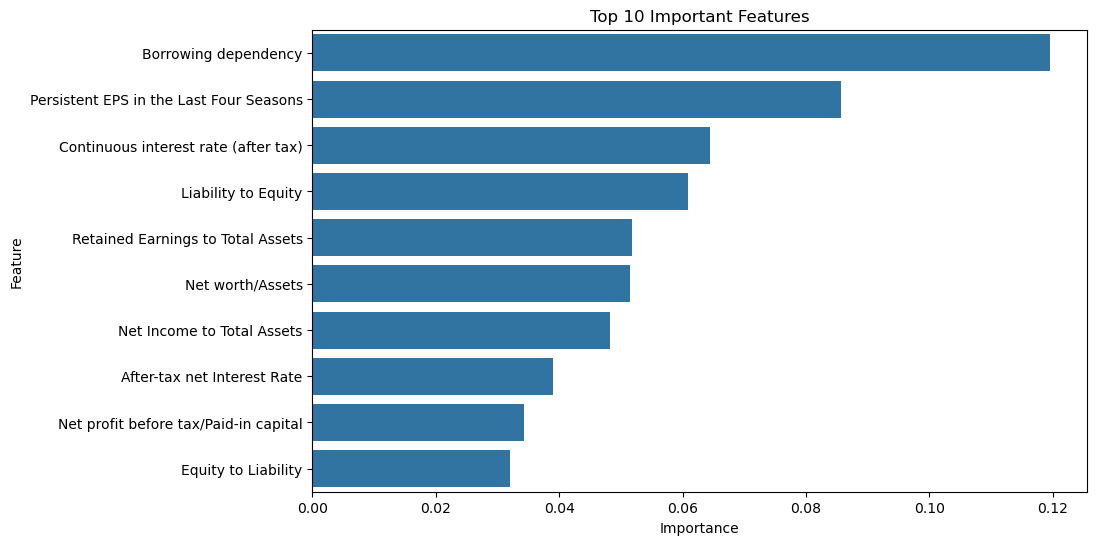

In [69]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()